In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:

#Check Target Variable

train['label'].value_counts()


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [0]:

#Seperating the target variable
y_train = train['label'].values
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [0]:
#deleting label
del train['label']

In [0]:
X_train = train.iloc[:,:].values
X_test  = test.iloc[:,:].values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [0]:
#Reshaping
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

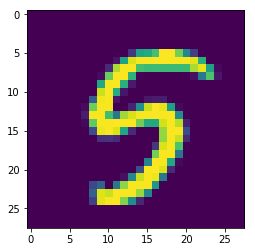

In [0]:
x = train
x = x.values.reshape(-1,28,28,1)
plt.imshow(x[8][:,:,0])
del x

In [0]:
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten

from keras.layers import Conv2D, MaxPooling2D

from keras.utils import  to_categorical

from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
y_train = to_categorical(y_train,10)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [0]:
import keras

#Creating Model
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
__________

In [0]:
opt = Adam(lr = 0.001)
#Training the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
from keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor = 'acc',patience = 3,verbose = 1,factor = 0.2,min_lr = 0.00001)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center = False,
                            samplewise_center = False,
                            featurewise_std_normalization = False,
                            samplewise_std_normalization = False,
                            zca_whitening = False,
                            rotation_range = 10,
                            zoom_range = 0.1,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            horizontal_flip = False,
                            vertical_flip = False)

datagen.fit(X_train)

In [0]:
history = model.fit_generator(datagen.flow(X_train,y_train,batch_size = 128),steps_per_epoch=60000//128, epochs = 100,verbose = 2,callbacks = [lr_reduction])

Epoch 1/100
 - 23s - loss: 0.0634 - acc: 0.9813
Epoch 2/100
 - 23s - loss: 0.0607 - acc: 0.9825
Epoch 3/100
 - 23s - loss: 0.0531 - acc: 0.9847
Epoch 4/100
 - 23s - loss: 0.0515 - acc: 0.9851
Epoch 5/100
 - 24s - loss: 0.0484 - acc: 0.9860
Epoch 6/100
 - 23s - loss: 0.0493 - acc: 0.9858
Epoch 7/100
 - 23s - loss: 0.0489 - acc: 0.9862
Epoch 8/100
 - 23s - loss: 0.0433 - acc: 0.9873
Epoch 9/100
 - 23s - loss: 0.0433 - acc: 0.9873
Epoch 10/100
 - 23s - loss: 0.0398 - acc: 0.9886
Epoch 11/100
 - 23s - loss: 0.0382 - acc: 0.9891
Epoch 12/100
 - 23s - loss: 0.0369 - acc: 0.9891
Epoch 13/100
 - 23s - loss: 0.0365 - acc: 0.9892
Epoch 14/100
 - 23s - loss: 0.0374 - acc: 0.9891
Epoch 15/100
 - 23s - loss: 0.0328 - acc: 0.9906
Epoch 16/100
 - 23s - loss: 0.0365 - acc: 0.9891
Epoch 17/100
 - 23s - loss: 0.0352 - acc: 0.9900
Epoch 18/100
 - 23s - loss: 0.0320 - acc: 0.9909
Epoch 19/100
 - 23s - loss: 0.0325 - acc: 0.9906
Epoch 20/100
 - 23s - loss: 0.0332 - acc: 0.9905
Epoch 21/100
 - 23s - loss: 0